In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

### Import Dataset

In [36]:
df = pd.read_csv('international_matches.csv')

In [37]:
# count number of nans in each column
df.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [38]:
# if at least 1 nan in the columns: home_team_goalkeeper_score, away_team_goalkeeper_score, home_team_mean_defense_score, home_team_mean_offense_score, home_team_mean_midfield_score, away_team_mean_defense_score, away_team_mean_offense_score, away_team_mean_midfield_score, then drop the row
df_cleaned = df.dropna(subset=['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score'])
df_cleaned

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8264,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
8266,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
8271,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
8276,2004-09-04,Iceland,Bulgaria,Europe,Europe,80,41,0,0,1,...,No,Lose,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5
8278,2004-09-04,Italy,Norway,Europe,Europe,9,38,0,0,2,...,No,Win,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,No,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2


In [39]:
df_cleaned.isna().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

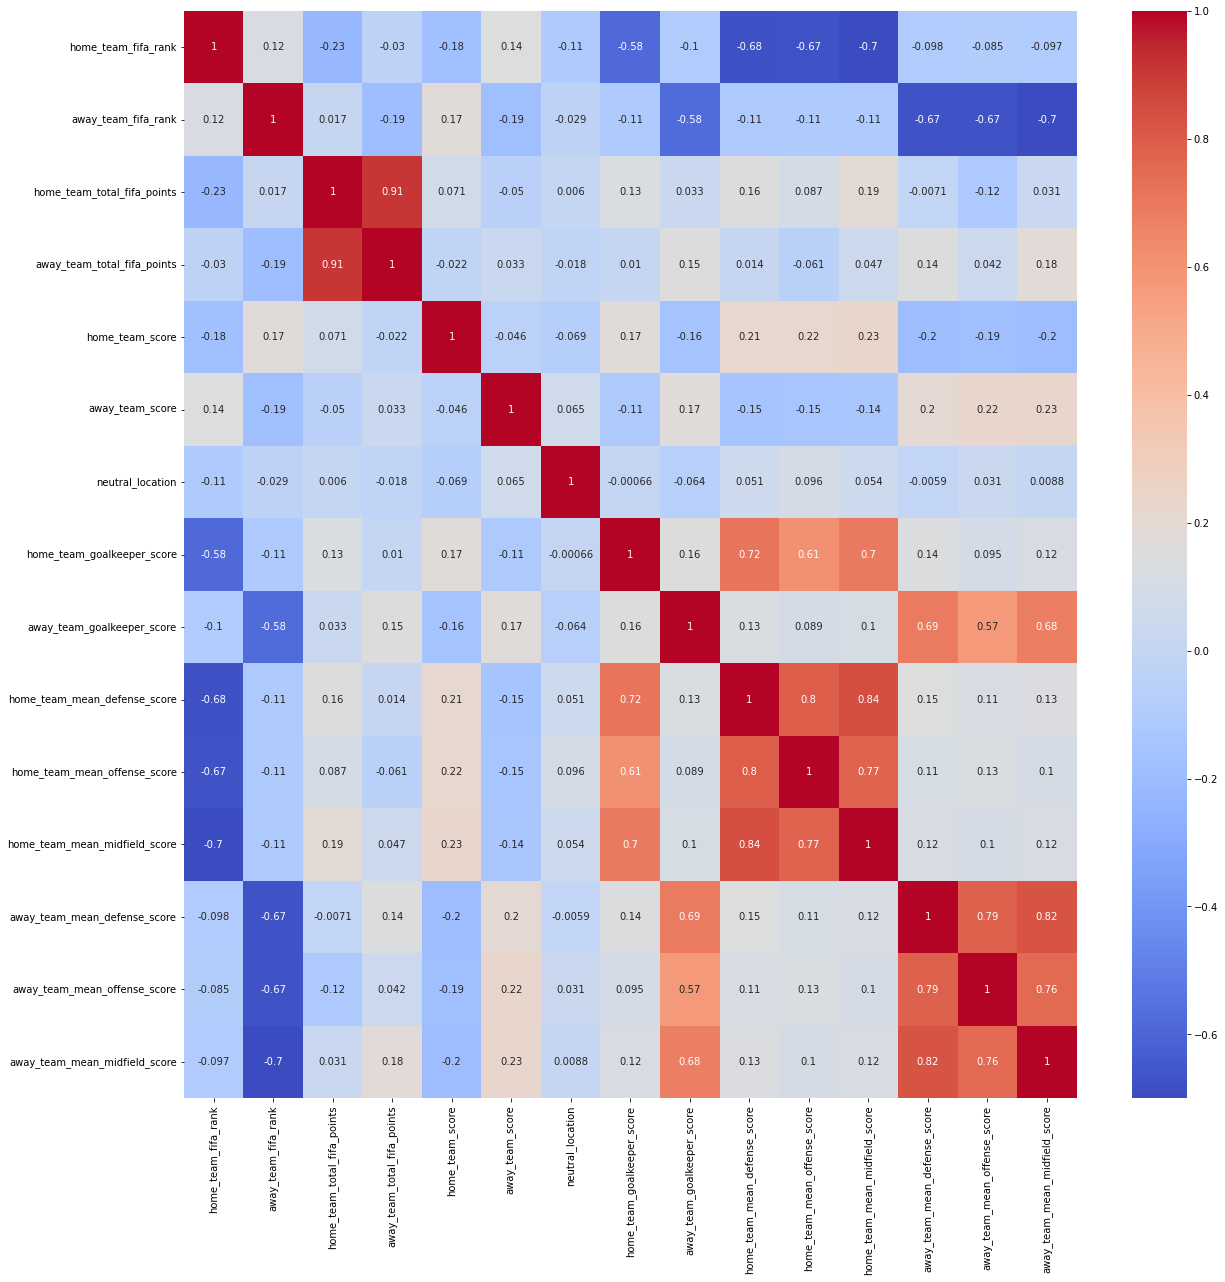

,away_team_total_fifa_points,away_team_fifa_rank
away_team_total_fifa_points,1.000000,-0.189737
away_team_fifa_rank,-0.189737,1.000000


In [29]:
# plot correlation matrix between all columns
corr = df_cleaned.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# find correlation between away_team_total_fifa_points and away_team_fifa_rank
df_cleaned[['away_team_total_fifa_points', 'away_team_fifa_rank']].corr()

No significant correlation between a team's rank and the total fifa points. Therefore, keep both columns

In [30]:
# drop rows where home_team_total_fifa_points and away_team_total_fifa_points are both zero
df_cleaned2 = df_cleaned.drop(df_cleaned[(df_cleaned['home_team_total_fifa_points'] == 0) & (df_cleaned['away_team_total_fifa_points'] == 0)].index)
df_cleaned2

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,1,...,No,Win,77.0,64.0,80.8,88.3,85.2,72.2,73.7,75.5
14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,0,...,No,Lose,75.0,76.0,63.2,67.3,68.0,72.0,77.7,78.0
14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,0,...,No,Lose,80.0,83.0,70.8,73.7,73.5,84.0,81.3,85.8
14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,5,...,No,Win,69.0,63.0,70.5,74.7,76.8,65.2,72.3,71.8
14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,6,...,No,Win,87.0,75.0,83.0,83.7,85.0,75.8,74.0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,No,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2


- *df* = Original Full Dataframe
- *df_cleaned* = Removed rows where there is at least 1 NaN from the FIFA player ratings columns (Reduces matches to 2004 - 2022)
- *df_cleaned2* = Removed rows where FIFA total_points is zero (Reduces matches to 2011 - 2022)